<a href="https://colab.research.google.com/github/wcrowley342/tourdefancedata/blob/main/TourDeFranceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This overview is meant to build upon the already great resources floating around (listed below) analyzing historical Tour de France data and showcase the power of python for data analysis through the rudimentary application of a few popular libraries. 

# Rider Data Overview & Analysis

Source of the data: https://www.letour.fr/en/history

On its official website, the Tour de France lists riders’ results in its famed bicycle race since 1903. The site doesn’t provide downloads, but applied mathematician Thomas Camminady has scraped it to build a CSV file containing each finisher’s rank, time, team, and more.

**Import libraries**

Import necessary libraries from python. We'll use the pandas library for our data subset and manipulation operations and matplotlib for charting/graphing purposes

In [26]:
# Some basic, common libraries used:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib import rcParams
import seaborn as sns
sns.set_context("notebook", font_scale=1.25)
import plotly as py
import plotly.express as px

**Import the data**

Scrape data (download from site into HTML format). Clean up data and convert into readable CSV
https://github.com/camminady/LeTourDataSet/blob/master/main.ipynb

In [27]:
#Read in data into "rider_df" data frame
# https://github.com/camminady/LeTourDataSet/blob/master/README.md

rider_df = pd.read_csv('https://raw.githubusercontent.com/camminady/LeTourDataSet/master/Riders.csv')

Lets inspect or visualize first 5 rows of data using the .head method 


In [30]:
rider_df.head()

Unnamed: 0  Year                  Rider  ...  Points NumberStages  ListedAvgPace
0           0  1903          MAURICE GARIN  ...     NaN          6.0         25.679
1           1  1903         LUCIEN POTHIER  ...     NaN          6.0         25.679
2           2  1903       FERNAND AUGEREAU  ...     NaN          6.0         25.679
3           3  1903        RODOLPHE MULLER  ...     NaN          6.0         25.679
4           4  1903  JEAN-BAPTISTE FISCHER  ...     NaN          6.0         25.679

[5 rows x 18 columns]

This is a great data set, but its missing rider nationality, age, and other interesting variables we might want to dig further into. Lets grab another dataset as well and read it in.

In [4]:
# fetch the text from the URL and read it into a DataFrame
winners_df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')
winners_df.head()

edition  start_date  ... birth_country nationality
0        1  1903-07-01  ...         Italy      France
1        2  1904-07-02  ...        France      France
2        3  1905-07-09  ...        France      France
3        4  1906-07-04  ...        France      France
4        5  1907-07-08  ...        France      France

[5 rows x 19 columns]

Some redundant variables/columns here, but also some new ones as well!

**Clean the data**

In [5]:
#rider_df.fillna(0, inplace=True)

Drop the first column, which is unnecessary

In [25]:
rider_df = rider_df.iloc[: , 1:]

rider_df.head(10)

Time  DistanceKilometer  ...  NumberStages  ListedAvgPace
0   94h 33' 14''             2428.0  ...           6.0         25.679
1   97h 32' 35''             2428.0  ...           6.0         25.679
2   99h 02' 38''             2428.0  ...           6.0         25.679
3   99h 12' 44''             2428.0  ...           6.0         25.679
4   99h 41' 58''             2428.0  ...           6.0         25.679
5  101h 37' 38''             2428.0  ...           6.0         25.679
6  104h 06' 22''             2428.0  ...           6.0         25.679
7  105h 59' 18''             2428.0  ...           6.0         25.679
8  106h 27' 28''             2428.0  ...           6.0         25.679
9  108h 20' 11''             2428.0  ...           6.0         25.679

[10 rows x 12 columns]

that "Bonus" and "Points" column doesn't seem to be too helpful, lets drop those

In [7]:
rider_df = rider_df.drop(["Bonus", "Points"], axis=1)
rider_df.head()


Year                  Rider  ...  NumberStages ListedAvgPace
0  1903          MAURICE GARIN  ...           6.0        25.679
1  1903         LUCIEN POTHIER  ...           6.0        25.679
2  1903       FERNAND AUGEREAU  ...           6.0        25.679
3  1903        RODOLPHE MULLER  ...           6.0        25.679
4  1903  JEAN-BAPTISTE FISCHER  ...           6.0        25.679

[5 rows x 15 columns]

That's better! Lets see if we can rename some of the columns as well

Well do the same steps of removing unnecessary columns for our other dataset as well

In [ ]:
winners_df = winners_df.iloc[: , 1:]

winners_df = winners_df.drop(["born","died","full_name","birth_town","birth_country"], axis=1)
winners_df.head()

start_date          winner_name  ...                  nickname  nationality
0  1903-07-01        Maurice Garin  ...  The Little Chimney-sweep       France
1  1904-07-02         Henri Cornet  ...     Le rigolo (The joker)       France
2  1905-07-09    Louis Trousselier  ...       Levaloy / Trou-trou       France
3  1906-07-04         René Pottier  ...                       NaN       France
4  1907-07-08  Lucien Petit-Breton  ...       Lucien Petit-Breton       France

[5 rows x 13 columns]

lets rename that first column and see if we can trim it down

In [ ]:
#winners_df  print(arr[:4])

winners_df = winners_df.rename(columns={'start_date': 'Year', 'winner_name': 'Rider', "height":"height(meters)"})
winners_df.head(5)

Year                Rider  ...                  nickname  nationality
0  1903-07-01        Maurice Garin  ...  The Little Chimney-sweep       France
1  1904-07-02         Henri Cornet  ...     Le rigolo (The joker)       France
2  1905-07-09    Louis Trousselier  ...       Levaloy / Trou-trou       France
3  1906-07-04         René Pottier  ...                       NaN       France
4  1907-07-08  Lucien Petit-Breton  ...       Lucien Petit-Breton       France

[5 rows x 13 columns]

In [ ]:
#winners_df = winners_df.year[:3]] 

#winners_df["year"] = winners_df["Year"[:3]]

lets see if we can convert from kgs to lbs

In [ ]:
winners_df['weight (lbs)'] = winners_df['weight'] * 2.205

winners_df.head(10)

Year                Rider  ...  nationality  weight (lbs)
0  1903-07-01        Maurice Garin  ...       France        132.30
1  1904-07-02         Henri Cornet  ...       France           NaN
2  1905-07-09    Louis Trousselier  ...       France           NaN
3  1906-07-04         René Pottier  ...       France           NaN
4  1907-07-08  Lucien Petit-Breton  ...       France           NaN
5  1908-07-13  Lucien Petit-Breton  ...       France           NaN
6  1909-07-05       François Faber  ...   Luxembourg        194.04
7  1910-07-01        Octave Lapize  ...       France           NaN
8  1911-07-02     Gustave Garrigou  ...       France           NaN
9  1912-06-30        Odile Defraye  ...      Belgium           NaN

[10 rows x 14 columns]

lets drop the old weight and get that new weight back next to height

In [ ]:
winners_df = winners_df[['Year', 'Rider', 'winner_team', 'distance', 'time_overall', 'time_margin', 'stage_wins', 'stages_led', 'height(meters)', 'weight (lbs)', 'age', 'nickname', 'nationality']]
winners_df.head()

Year                Rider  ...                  nickname  nationality
0  1903-07-01        Maurice Garin  ...  The Little Chimney-sweep       France
1  1904-07-02         Henri Cornet  ...     Le rigolo (The joker)       France
2  1905-07-09    Louis Trousselier  ...       Levaloy / Trou-trou       France
3  1906-07-04         René Pottier  ...                       NaN       France
4  1907-07-08  Lucien Petit-Breton  ...       Lucien Petit-Breton       France

[5 rows x 13 columns]

finally, it looks like the data had a tough time with the accents used frequently in rider names. "é" was replaced with "Ã‰, lets see if we can find and replace those quickly

In [33]:
rider_df.loc[rider_df['Rider'].str.contains('Ã‰')]

Empty DataFrame
Columns: [Unnamed: 0, Year, Rider, Rank, Time, DistanceKilometer, PersonalAvgPace, Hours, Minutes, Seconds, Team, RiderNumber, TotalSeconds, Gap, Bonus, Points, NumberStages, ListedAvgPace]
Index: []

# Explorator Data Analysis (EDA)

At the beginning of a data analysis we'll want to explore any possible relationships and other insights we can learn from the data.

Get the "shape" of the data frame (number of rows & columns)

In [ ]:
print(rider_df.shape)

(9452, 17)


the .describe method shows a quick statistical summary of our data

In [ ]:
rider_df.describe()

Year         Rank  ...  NumberStages  ListedAvgPace
count  9452.000000  9452.000000  ...   9452.000000    9151.000000
mean   1981.128862    57.569086  ...     21.352730      36.589313
std      29.744678    41.113251  ...      2.311157       4.255119
min    1903.000000     1.000000  ...      6.000000      24.056000
25%    1962.000000    23.000000  ...     21.000000      34.906000
50%    1988.000000    49.000000  ...     21.000000      38.059000
75%    2005.000000    86.000000  ...     23.000000      39.788000
max    2020.000000   174.000000  ...     26.000000      41.654000

[8 rows x 12 columns]

In [ ]:
rider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9452 entries, 0 to 9451
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9452 non-null   int64  
 1   Rider              9452 non-null   object 
 2   Rank               9452 non-null   int64  
 3   Time               9255 non-null   object 
 4   DistanceKilometer  9452 non-null   float64
 5   PersonalAvgPace    9255 non-null   float64
 6   Hours              9255 non-null   float64
 7   Minutes            9255 non-null   float64
 8   Seconds            9255 non-null   float64
 9   Team               9452 non-null   object 
 10  RiderNumber        9452 non-null   int64  
 11  TotalSeconds       9255 non-null   float64
 12  Gap                9255 non-null   object 
 13  Bonus              164 non-null    object 
 14  Points             197 non-null    float64
 15  NumberStages       9452 non-null   float64
 16  ListedAvgPace      9151 

look the aggregates for each year

In [ ]:
rider_df.groupby('Year').agg([np.mean,np.median])

Rank        DistanceKilometer  ... NumberStages ListedAvgPace        
      mean median              mean  ...       median          mean  median
Year                                 ...                                   
1903  11.0   11.0            2428.0  ...          6.0        25.679  25.679
1904   8.0    8.0            2428.0  ...          6.0        25.265  25.265
1905  12.5   12.5            2994.0  ...         11.0        27.107  27.107
1906   7.5    7.5            4637.0  ...         13.0        24.463  24.463
1907  17.0   17.0            4488.0  ...         14.0        28.470  28.470
...    ...    ...               ...  ...          ...           ...     ...
2016  87.5   87.5            3525.0  ...         21.0        39.571  39.571
2017  84.0   84.0            3540.0  ...         21.0        40.995  40.995
2018  73.0   73.0            3349.0  ...         21.0        40.206  40.206
2019  78.0   78.0            3366.0  ...         21.0           NaN     NaN
2020  73.5   73.5            3366.0  ...         21.0           NaN     NaN

[107 rows x 22 columns]

Lets see if we can get the number of riders every year

In [ ]:
number_riders = rider_df.groupby('Year').Year.count()
number_riders

Year
1903     21
1904     15
1905     24
1906     14
1907     33
       ... 
2016    174
2017    167
2018    145
2019    155
2020    146
Name: Year, Length: 107, dtype: int64

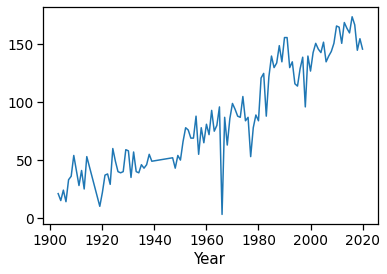

In [ ]:
rider_df.groupby(['Year'])['Rank'].count().plot()

<function matplotlib.pyplot.show>

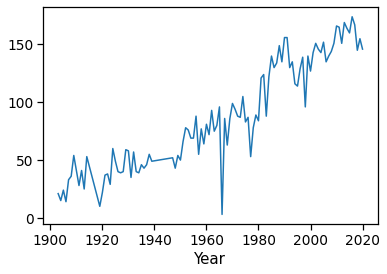

In [ ]:
rider_df.groupby('Year')['Rank'].nunique().plot(kind='line')
plt.show

Lets clean this graphic up a bit using the seaborn package

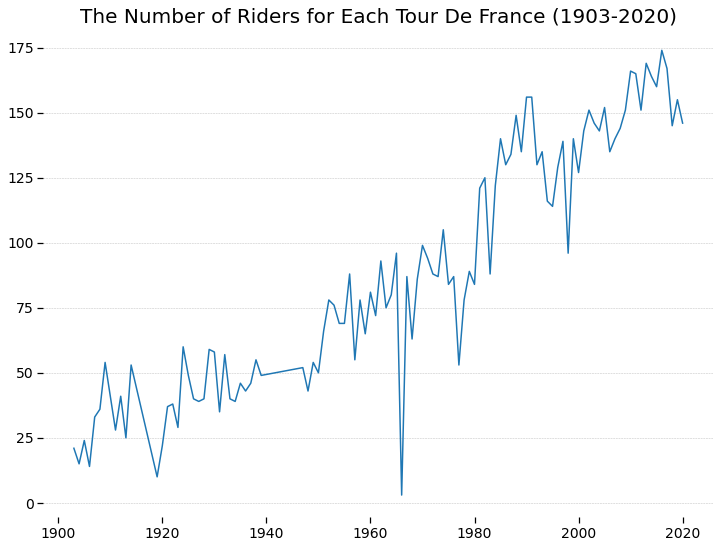

In [ ]:
plt.figure(figsize=(12,9))
x_values = rider_df.Year.unique()  
y_values = number_riders
title = ('The Number of Riders for Each Tour De France (1903-2020)')
plt.title(title, fontsize=20)
#plt.ylabel('Number of Players Drafted', fontsize=18)
#plt.xlim(1966, 2014.5)
#plt.ylim(0, 250)
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)
plt.tick_params(axis='both', labelsize=14) 
sns.despine(left=True, bottom=True) 
plt.plot(x_values, y_values)
plt.show()

In [20]:
#filtering by winners

winners_list = rider_df.loc[(rider_df['Rank'] == 1)]
print(winners_list)

      Year                          Rider  ...  NumberStages ListedAvgPace
0     1903                  MAURICE GARIN  ...           6.0        25.679
21    1904   HENRI CORNET (GEBOREN JARDY)  ...           6.0        25.265
36    1905              LOUIS TROUSSELIER  ...          11.0        27.107
60    1906                   RENÉ POTTIER  ...          13.0        24.463
74    1907  LUCIEN MAZAN DIT PETIT-BRETON  ...          14.0        28.470
...    ...                            ...  ...           ...           ...
8665  2016                   CHRIS FROOME  ...          21.0        39.571
8839  2017                   CHRIS FROOME  ...          21.0        40.995
9006  2018                 GERAINT THOMAS  ...          21.0        40.206
9151  2019              EGAN BERNAL GOMEZ  ...          21.0           NaN
9306  2020                  TADEJ POGACAR  ...          21.0           NaN

[100 rows x 15 columns]


In [21]:
winners_list.head()

Year                          Rider  Rank  ...  Gap  NumberStages  ListedAvgPace
0   1903                  MAURICE GARIN     1  ...    -           6.0         25.679
21  1904   HENRI CORNET (GEBOREN JARDY)     1  ...    -           6.0         25.265
36  1905              LOUIS TROUSSELIER     1  ...    -          11.0         27.107
60  1906                   RENÉ POTTIER     1  ...    -          13.0         24.463
74  1907  LUCIEN MAZAN DIT PETIT-BRETON     1  ...  NaN          14.0         28.470

[5 rows x 15 columns]

so it looks like this gives us a new dataframe of the winners, which is great, but as you can see, the index from the filtered data remanined, and is no longer in a logical order. lets clean that up by resetting the index for this newly created data frame.

In [22]:
winners_list = winners_list.reset_index(drop=True)

winners_list

Year                          Rider  Rank  ...  Gap  NumberStages  ListedAvgPace
0   1903                  MAURICE GARIN     1  ...    -           6.0         25.679
1   1904   HENRI CORNET (GEBOREN JARDY)     1  ...    -           6.0         25.265
2   1905              LOUIS TROUSSELIER     1  ...    -          11.0         27.107
3   1906                   RENÉ POTTIER     1  ...    -          13.0         24.463
4   1907  LUCIEN MAZAN DIT PETIT-BRETON     1  ...  NaN          14.0         28.470
..   ...                            ...   ...  ...  ...           ...            ...
95  2016                   CHRIS FROOME     1  ...    -          21.0         39.571
96  2017                   CHRIS FROOME     1  ...    -          21.0         40.995
97  2018                 GERAINT THOMAS     1  ...    -          21.0         40.206
98  2019              EGAN BERNAL GOMEZ     1  ...    -          21.0            NaN
99  2020                  TADEJ POGACAR     1  ...    -          21.0            NaN

[100 rows x 15 columns]

Much Better!

**Slowest and Fastest Winners**

In [11]:
# "slowest" winners

winners_list.sort_values('PersonalAvgPace')

Year                          Rider  ...  NumberStages ListedAvgPace
521  1924             OTTAVIO BOTTECCHIA  ...          15.0        24.250
385  1919                  FIRMIN LAMBOT  ...          15.0        24.056
630  1926                  LUCIEN BUYSSE  ...          17.0        24.273
395  1920                  PHILIPPE THYS  ...          15.0        24.072
454  1922                  FIRMIN LAMBOT  ...          15.0        24.196
..    ...                            ...  ...           ...           ...
74   1907  LUCIEN MAZAN DIT PETIT-BRETON  ...          14.0        28.470
143  1909                 FRANÇOIS FABER  ...          14.0        28.658
197  1910                  OCTAVE LAPIZE  ...          15.0        29.099
238  1911               GUSTAVE GARRIGOU  ...          15.0        27.322
266  1912                 ODIEL DEFRAEYE  ...          15.0        27.763

[100 rows x 15 columns]

In [12]:
winners_list.sort_values('PersonalAvgPace', ascending=False)

Year                          Rider  ...  NumberStages ListedAvgPace
36    1905              LOUIS TROUSSELIER  ...          11.0        27.107
60    1906                   RENÉ POTTIER  ...          13.0        24.463
107   1908  LUCIEN MAZAN DIT PETIT-BRETON  ...          14.0        28.740
7856  2011                    CADEL EVANS  ...          21.0        39.788
6022  1998                  MARCO PANTANI  ...          22.0        39.983
...    ...                            ...  ...           ...           ...
74    1907  LUCIEN MAZAN DIT PETIT-BRETON  ...          14.0        28.470
143   1909                 FRANÇOIS FABER  ...          14.0        28.658
197   1910                  OCTAVE LAPIZE  ...          15.0        29.099
238   1911               GUSTAVE GARRIGOU  ...          15.0        27.322
266   1912                 ODIEL DEFRAEYE  ...          15.0        27.763

[100 rows x 15 columns]

What if we were curious as to which riders competed in the most Tour De Frances, Tours De France, Tours Des Frances? Lets go with races....

In [ ]:
rider_df['Rider'].value_counts()[:10]

SYLVAIN CHAVANEL     16
VJATCESLAV EKIMOV    15
THOMAS VOECKLER      15
JOOP ZOETEMELK       15
HAIMAR ZUBELDIA      15
LUCIEN VAN IMPE      15
STUART O'GRADY       15
JENS VOIGT           14
JÉRÔME PINEAU        13
PHIL ANDERSON        13
Name: Rider, dtype: int64

It looks like French cyclist Sylvain Chavanel leads the pack with 16 entries into the Tour!

Lets unpack this line of code a bit...

In [ ]:
#rider_df['Rider] selects the "Rider" column from our dataframe, generating a series 

#.values_counts() is a method counting the values in this new series; this actually creates a new series where the index is the Rider and the values are how often they occured (descending from most frequent)

#[:10] gives us the first 10 most frequently occuring riders from this series; ultimately creating a final series, which is displayed above

lets add a simple bar chart to visually represent this. Because Python performs these steps from left to right, you can add .plot() method to the right of your previous line of code in order to visualize the results:

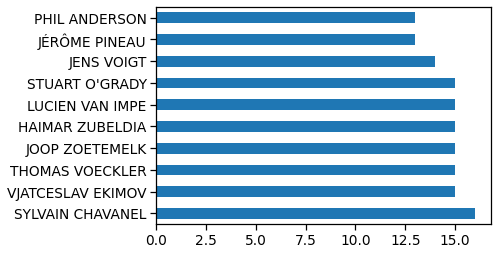

In [ ]:
rider_df['Rider'].value_counts()[:10].plot(kind='barh')

and how about teams? Which teams competed or were represented the most:

In [ ]:
rider_df['Team'].value_counts()[:10]

FRANCE                 193
BELGIQUE               170
TOURISTES ROUTIERS     151
ITALIE                 150
TOURISTES-ROUTIERS     123
ISOLES                 116
RABOBANK               102
AG2R LA MONDIALE        91
EUSKALTEL - EUSKADI     90
ESPAGNE                 82
Name: Team, dtype: int64

here's a good example of where proper data cleaning comes into play, as "Touriste-Routiers" (which translates to "tourists of the road") is - incorrectly - counted seperately from "Touristes Routiers"

Well use the .replace method to clean this up

In [ ]:
rider_df['Team'].replace(['TOURISTES ROUTIERS'],'TOURISTES-ROUTIERS', inplace = True)

In [ ]:
rider_df['Team'].value_counts()[:10]

TOURISTES-ROUTIERS     274
FRANCE                 193
BELGIQUE               170
ITALIE                 150
ISOLES                 116
RABOBANK               102
AG2R LA MONDIALE        91
EUSKALTEL - EUSKADI     90
ESPAGNE                 82
BANESTO                 77
Name: Team, dtype: int64

that's better!

In [ ]:
winners_df['nationality'].value_counts()[:10]

 France           36
 Belgium          18
 Spain            12
 Italy            10
 United States    10
 Great Britain     6
 Luxembourg        5
 Netherlands       2
  Switzerland      2
 Colombia          1
Name: nationality, dtype: int64

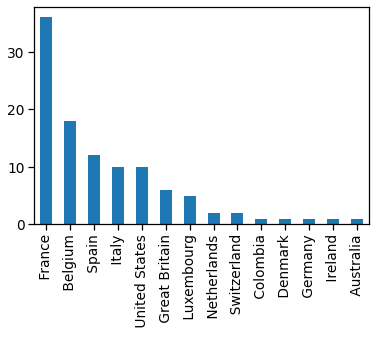

In [ ]:
winners_df['nationality'].value_counts().plot(kind='bar');

**Looking at the [age/height/weight] of winners (average/histrogram/trendlines)**

this other dataset contains age, lets break that down a bit with average, trendlines and historgrams

In [ ]:
#winners_df['age'].mean
mean_winner_age = winners_df["age"].mean()
print(mean_winner_age)

27.71698113207547


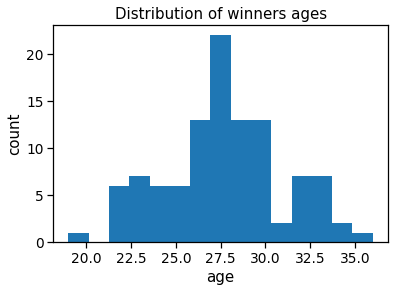

In [ ]:
winners_df.age.plot.hist(bins=15)
plt.title("Distribution of winners ages")
plt.ylabel('count')
plt.xlabel('age');

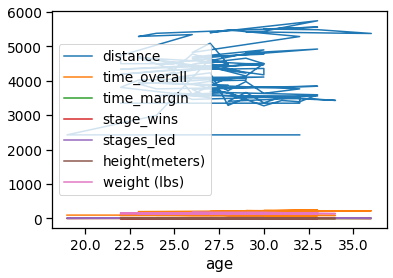

In [ ]:
#winners_df.plot("age")

winners_df.plot(x ='age', kind = 'line')

In [ ]:
#print("the avearge tour de fance winner is:

#'Age': mean_winner_age"
#'Weight: mean_winner_weight
#'Height: )

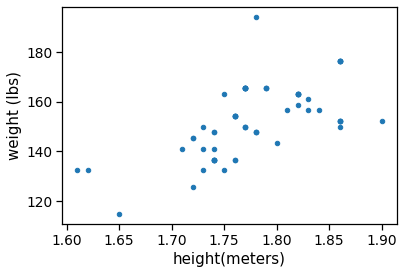

In [ ]:
ax1 = winners_df.plot.scatter(x='height(meters)',
                      y='weight (lbs)')

# Graphs & Visual Analysis

Create the columns/variables needed for the visualization

In [ ]:
year = np.unique(rider_df["Year"])
distance = rider_df.groupby("Year").agg("mean")["DistanceKilometer"].values
winnerpace = rider_df.groupby("Year").first()["PersonalAvgPace"]
winner = rider_df.groupby("Year").first()["Rider"]
meantime = rider_df.groupby("Year").agg("mean")["TotalSeconds"]
meanpace = distance/meantime*3600

Well want to create a new, trimmed down dataframe using these variables to run additional analysis.

In [ ]:
# Create the arrays for the above columns/variables 
array_year = np.array(year)
array_distance = np.array(distance)
array_winnerpace = np.array(winnerpace)
array_winner = np.array(winner)
array_meantime = np.array(meantime)
array_meanpace = np.array(meanpace)

In [ ]:
#construct the new dataframe - df2 - from a dictionary
data = {'year2': array_year, 'distance2': array_distance, 'winnerpace2': array_winnerpace, 'winner_name': array_winner, 'meantime2': array_meantime, 'meanpace2': array_meanpace}
df2 = pd.DataFrame(data)
df2.fillna(0, inplace=True)
df2.describe()

year2    distance2  winnerpace2      meantime2   meanpace2
count   107.000000   107.000000     107.0000     107.000000  107.000000
mean   1964.392523  4207.766355          inf  428367.808159         inf
std      34.406767   702.643869          NaN  203755.901478         NaN
min    1903.000000  2428.000000       0.0000       0.000000    0.000000
25%    1933.500000  3649.500000      31.2165  331090.563282   30.629930
50%    1967.000000  4138.000000      35.8820  413971.935714   35.304341
75%    1993.500000  4649.000000      39.2685  516788.546113   38.329431
max    2020.000000  5745.000000          inf  910068.181818         inf

In [ ]:
df2.head(20)

year2  distance2  ...      meantime2  meanpace2
0    1903     2428.0  ...  414368.428571  21.094271
1    1904     2428.0  ...  441867.733333  19.781485
2    1905     2994.0  ...       0.000000        inf
3    1906     4637.0  ...       0.000000        inf
4    1907     4488.0  ...       0.000000   0.000000
5    1908     4488.0  ...       0.000000        inf
6    1909     4497.0  ...       0.000000   0.000000
7    1910     4734.0  ...       0.000000   0.000000
8    1911     5343.0  ...       0.000000   0.000000
9    1912     5289.0  ...       0.000000   0.000000
10   1913     5287.0  ...  801173.240000  23.756660
11   1914     5380.0  ...  804063.622642  24.087646
12   1919     5560.0  ...  869205.300000  23.027931
13   1920     5503.0  ...  910068.181818  21.768479
14   1921     5485.0  ...  885120.081081  22.308837
15   1922     5375.0  ...  863924.052632  22.397802
16   1923     5386.0  ...  820162.827586  23.641159
17   1924     5425.0  ...  877230.633333  22.263244
18   1925     5440.0  ...  832149.204082  23.534241
19   1926     5745.0  ...  892007.975000  23.185891

[20 rows x 6 columns]

here is where we'll try to merge the two datasets on the "winner_name" field...

In [ ]:
 #combined_data = pd.merge(df2, winners_df, on="winner_name")

In [ ]:
#combined_data.head(4)

**Simple time series graph of the winners avg pace each year**

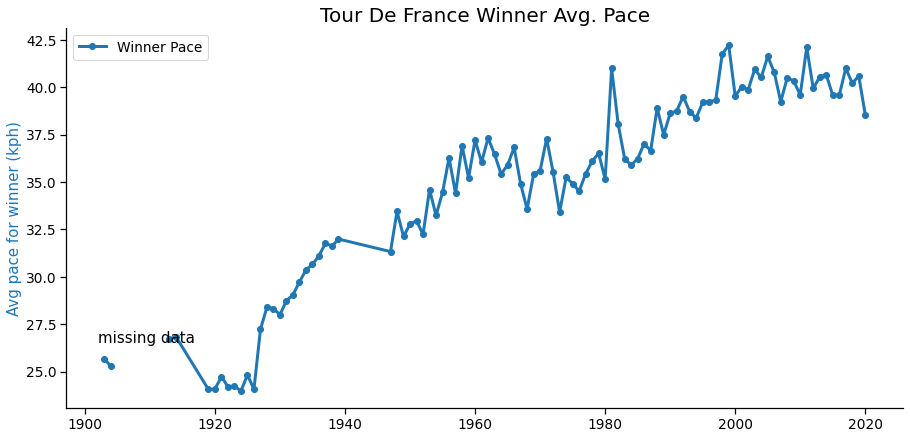

In [ ]:
#1st line (winner pace)
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,winnerpace, "-o",lw=3, label = 'Winner Pace')
ax.set_ylabel("Avg pace for winner (kph)",fontsize = 15, color= "tab:blue")
ax.set_title('Tour De France Winner Avg. Pace', fontsize = 20)
ax.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 360
sns.despine()

#2nd line trendline
#https://dzone.com/articles/python-how-to-add-trend-line-to-line-chartgraph 

#z = numpy.polyfit(year, winnerpace, 1)
#p = numpy.poly1d(z)
#pylab.plot(year,p(year))
#print “winnerpace =%.6fx+(%.6f)”%(z[0],z[1])

z = np.polyfit(year, winnerpace, 1)
p = np.poly1d(z)
#ax2.plot(year,p(year),"r--")

#add annotation

ax.text(1902.000000, 26.5, "missing data")


fig.show()

**Line Plot showing number of riders over time**

**Subplots broken down by decade (in progress)**

In [ ]:
#create the arrays needed for the plot
first = array_year[0:50]
second = array_year[51:100]

first2 = array_winnerpace[0:50]
second2 = array_winnerpace[51:100]

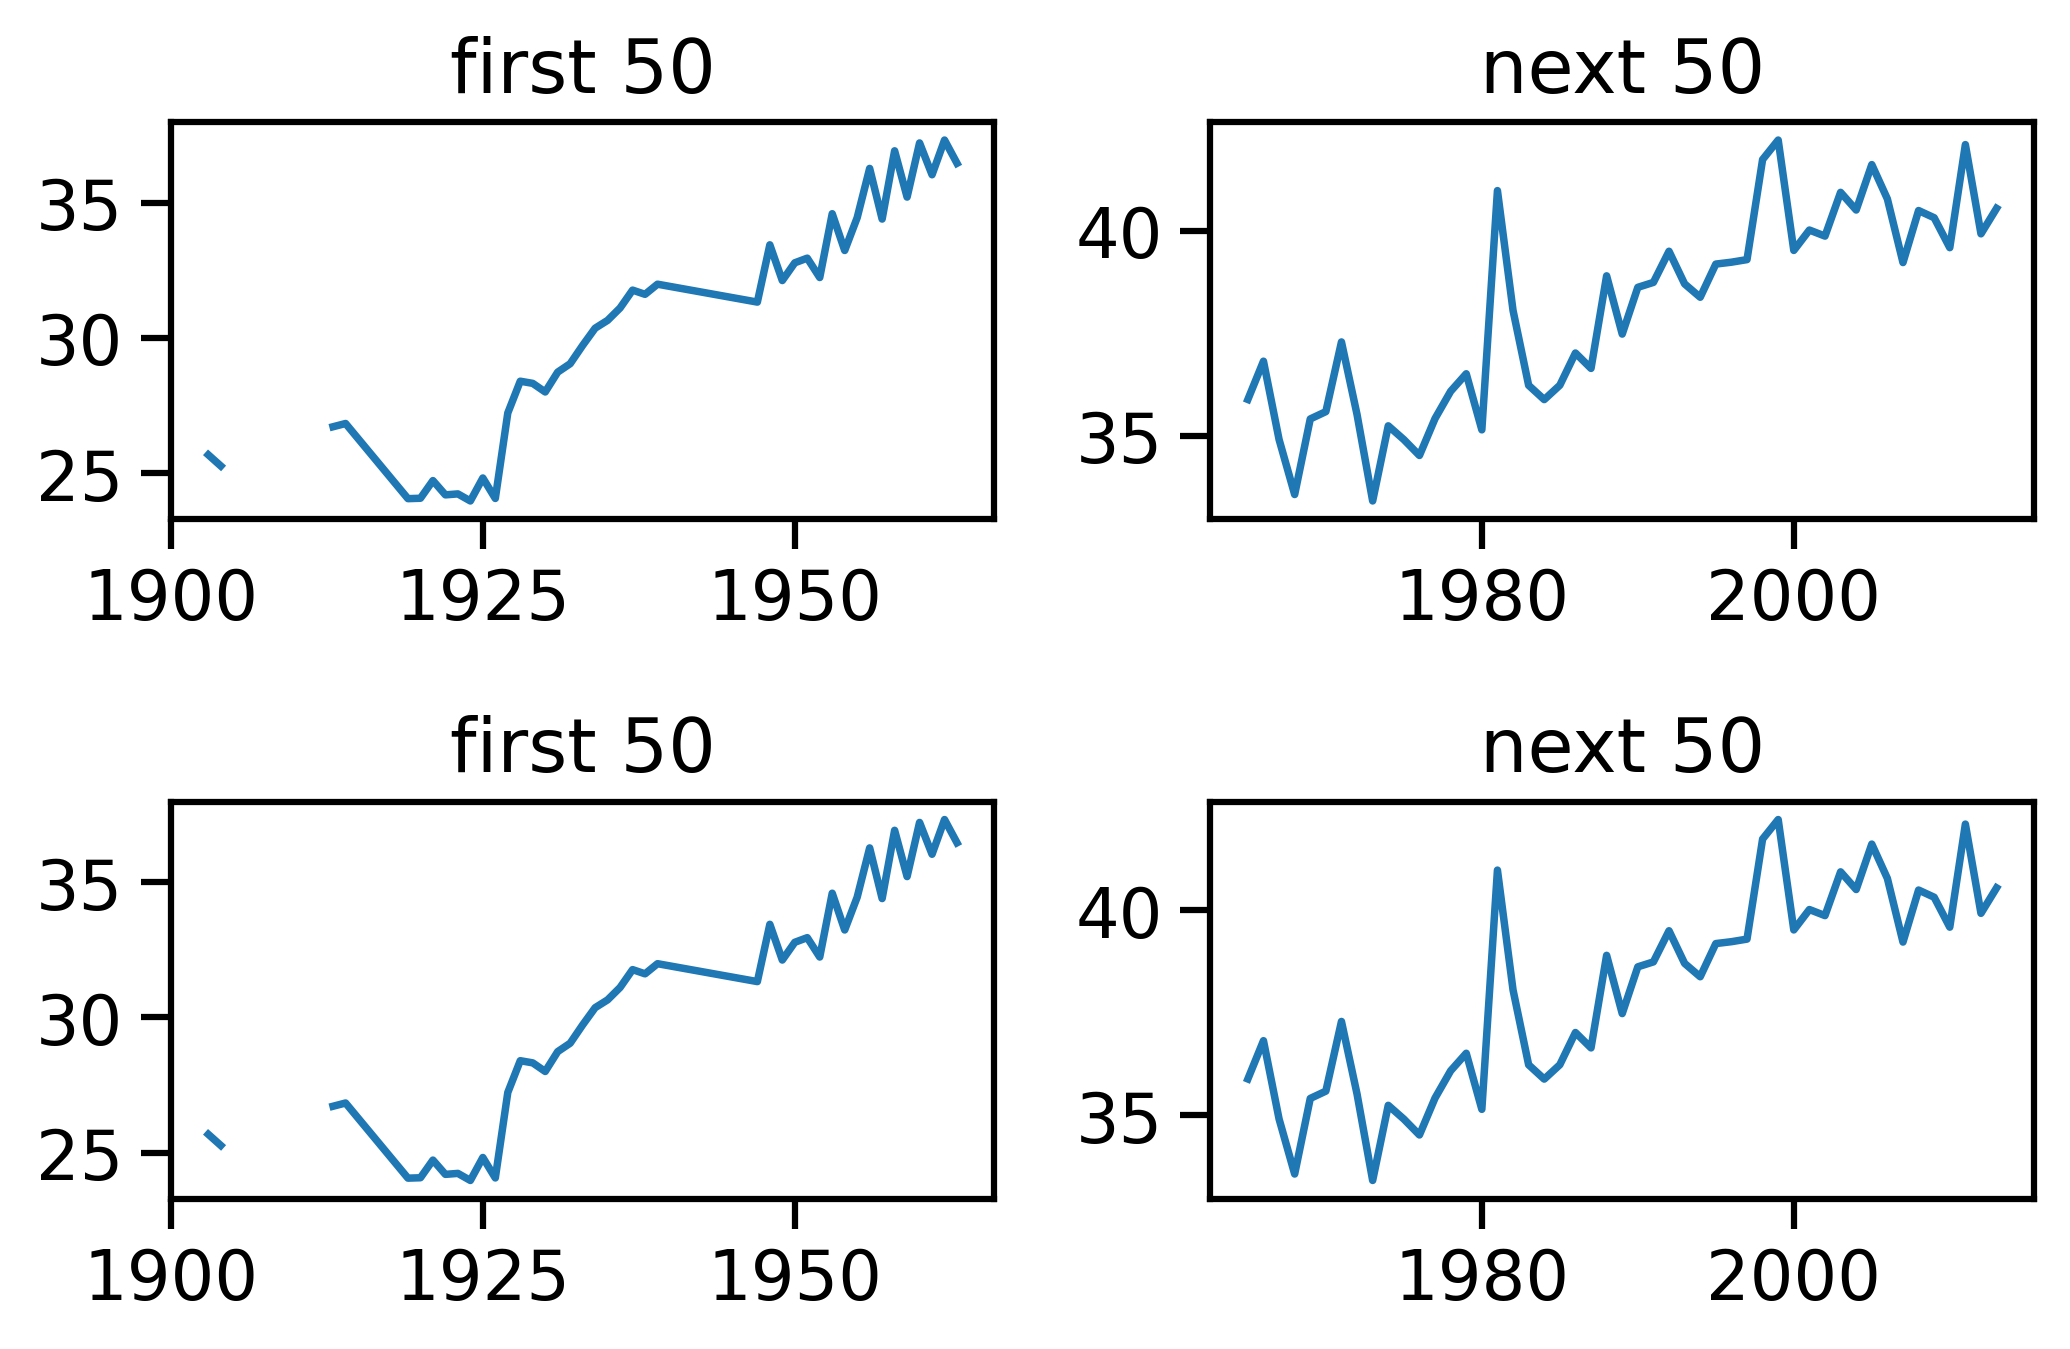

In [ ]:
fig, ( (ax1,ax2), (ax3,ax4) ) = plt.subplots(2,2)   

#first 50 winners

ax1.plot(first, first2)
ax1.set_title('first 50')

ax2.plot(second, second2)
ax2.set_title('next 50')

ax3.plot(first, first2)
ax3.set_title('first 50')

ax4.plot(second, second2)
ax4.set_title('next 50')

fig.tight_layout()
plt.show()

**Bar chart of all - and repeat - winners**

Helpful resource: https://pythonbasics.org/matplotlib-bar-chart/

This bar chart shows riders who have won the tour de france by number of wins

In [ ]:
df2['winner_name'].value_counts()

JACQUES ANQUETIL    5
MIGUEL INDURAIN     5
BERNARD HINAULT     5
EDDY MERCKX         5
JAN ULLRICH         4
                   ..
LUIS OCANA          1
IVAN BASSO          1
JOOP ZOETEMELK      1
MAURICE DE WAELE    1
ALEX ZULLE          1
Name: winner_name, Length: 67, dtype: int64

Text(0, 0.5, 'Number of Wins')

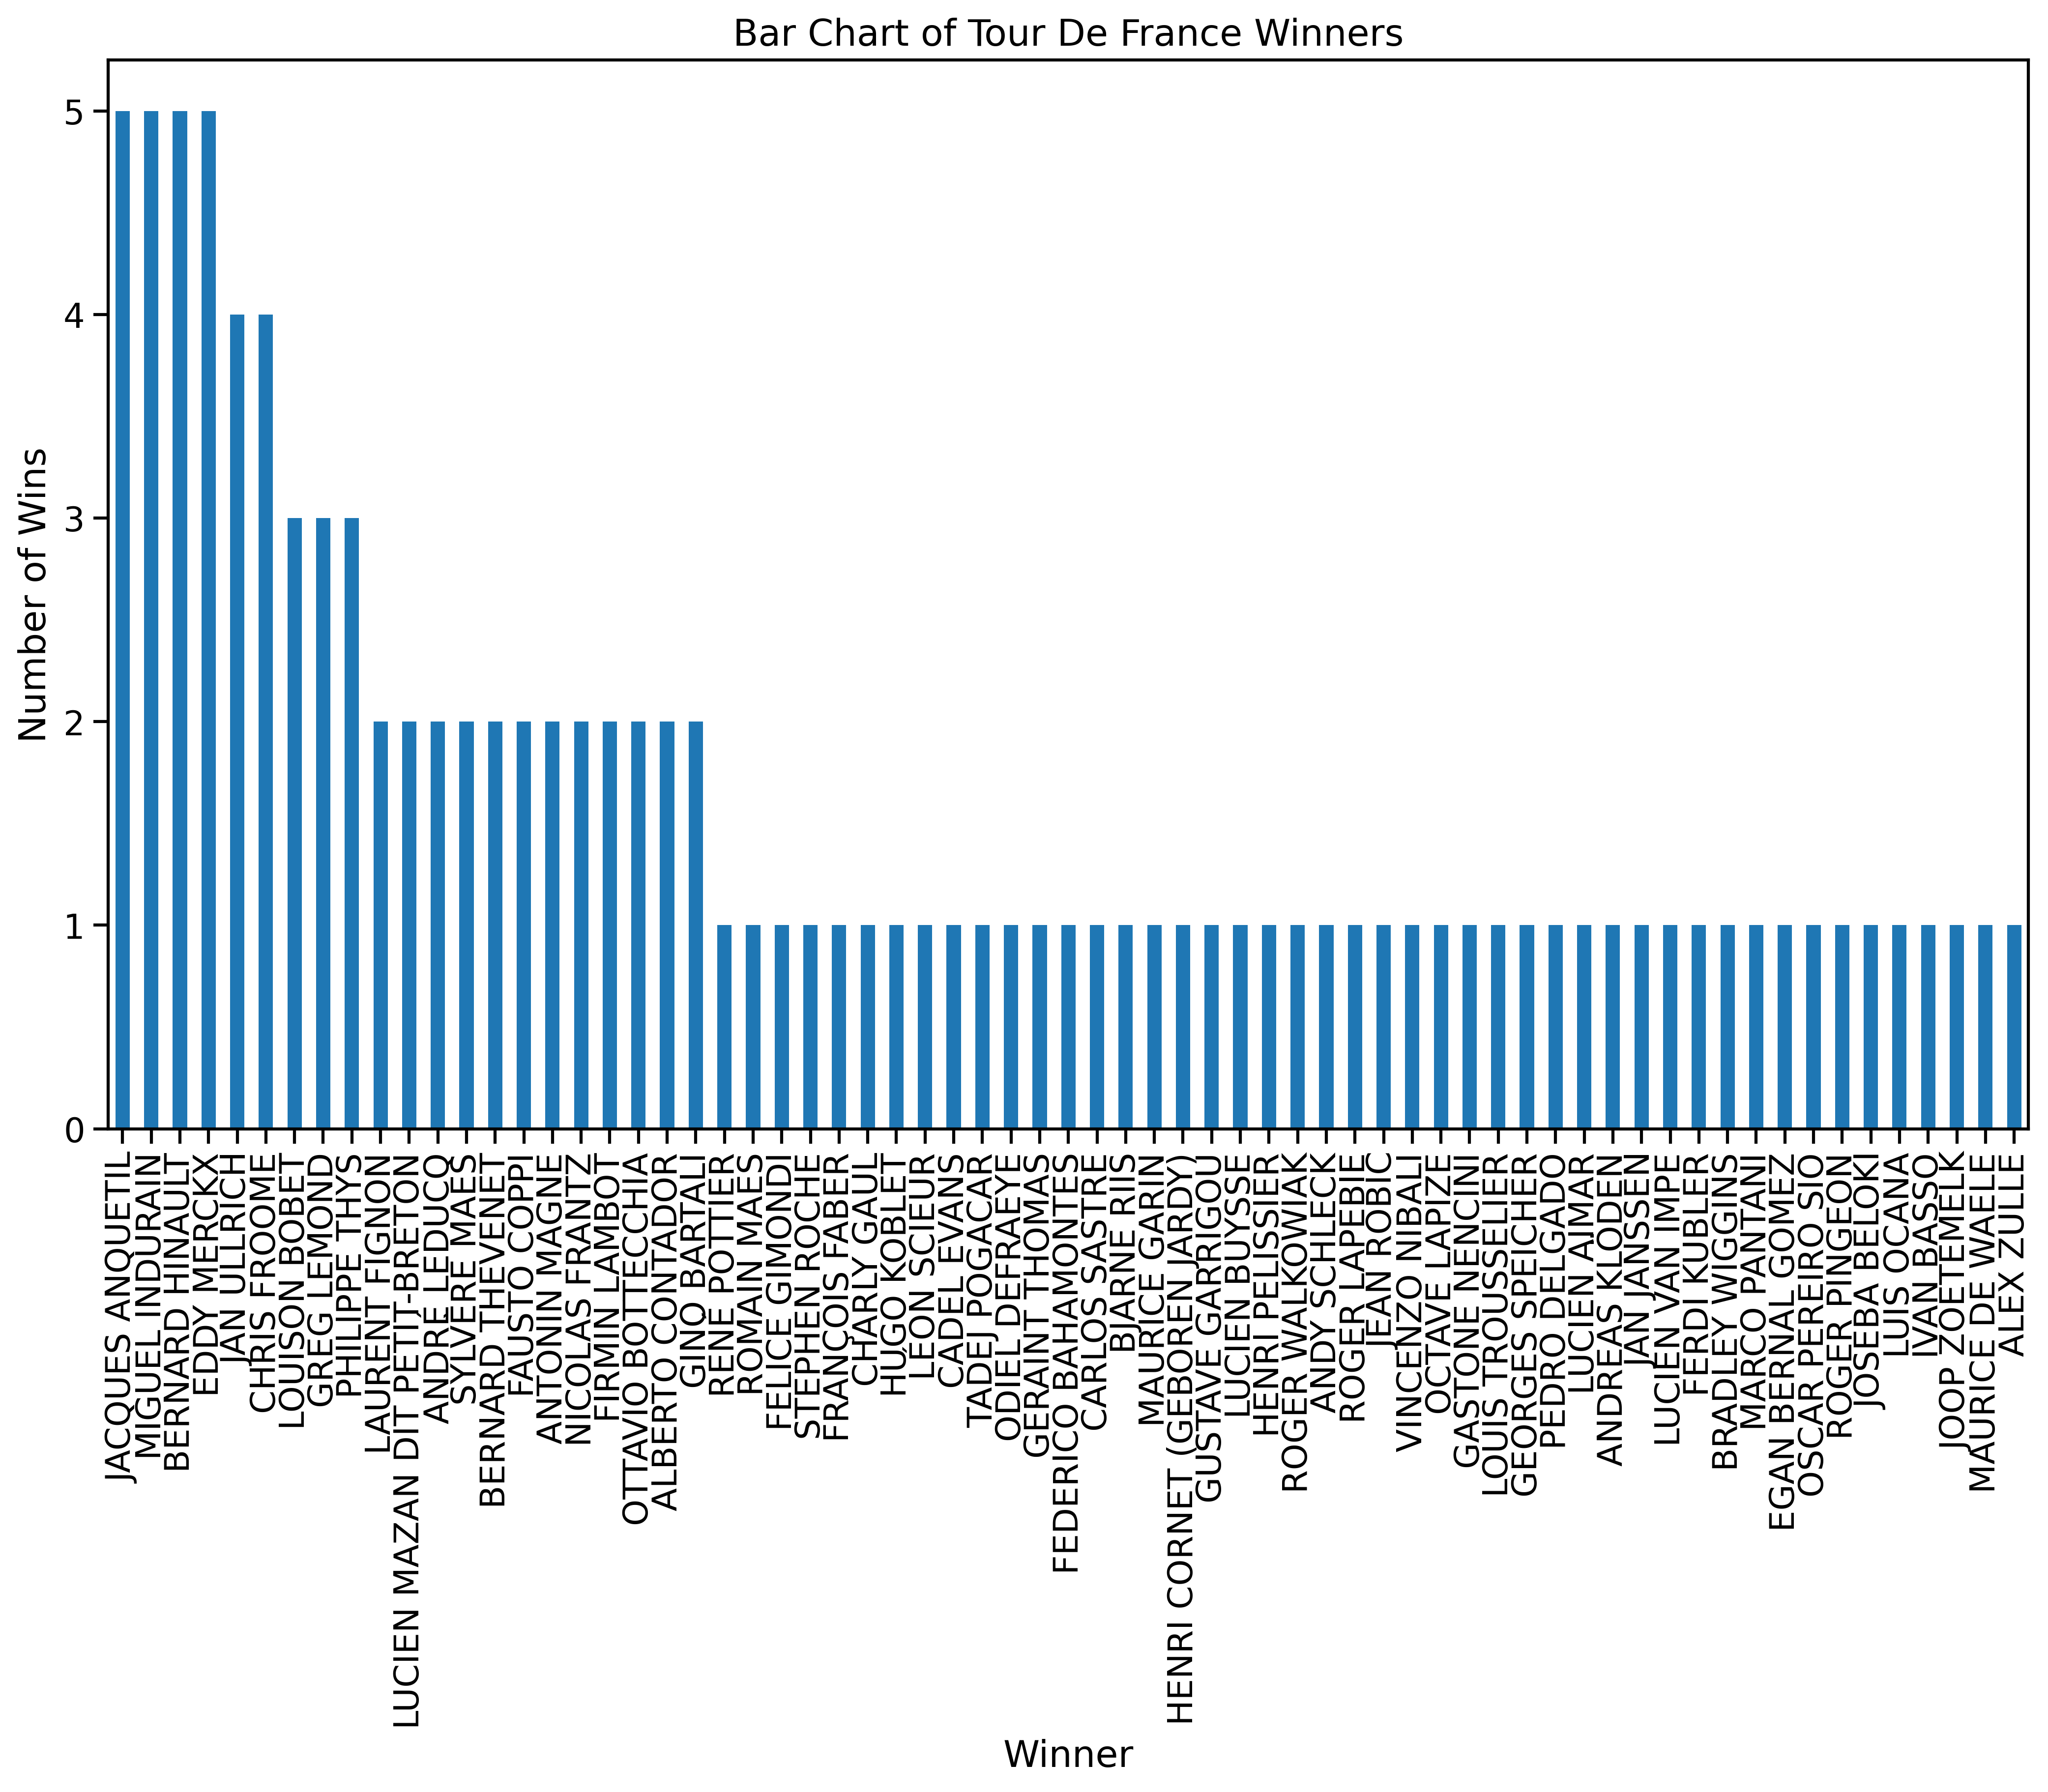

In [ ]:
ax = df2['winner_name'].value_counts().plot(kind='bar',
                                        figsize=(14,8),
                                        title="Bar Chart of Tour De France Winners")
ax.set_xlabel("Winner")
ax.set_ylabel("Number of Wins")

the above graph is a bit busy. No offense to the many riders who've won a single tour, but lets see if we can trim it down to just the riders who have won multiple times

In [ ]:
df2['winner_name'].value_counts().loc[lambda x : x>1]

JACQUES ANQUETIL                 5
MIGUEL INDURAIN                  5
BERNARD HINAULT                  5
EDDY MERCKX                      5
JAN ULLRICH                      4
CHRIS FROOME                     4
LOUISON BOBET                    3
GREG LEMOND                      3
PHILIPPE THYS                    3
LAURENT FIGNON                   2
LUCIEN MAZAN DIT PETIT-BRETON    2
ANDRÉ LEDUCQ                     2
SYLVÈRE MAES                     2
BERNARD THEVENET                 2
FAUSTO COPPI                     2
ANTONIN MAGNE                    2
NICOLAS FRANTZ                   2
FIRMIN LAMBOT                    2
OTTAVIO BOTTECCHIA               2
ALBERTO CONTADOR                 2
GINO BARTALI                     2
Name: winner_name, dtype: int64

Text(0, 0.5, 'Number of Wins')

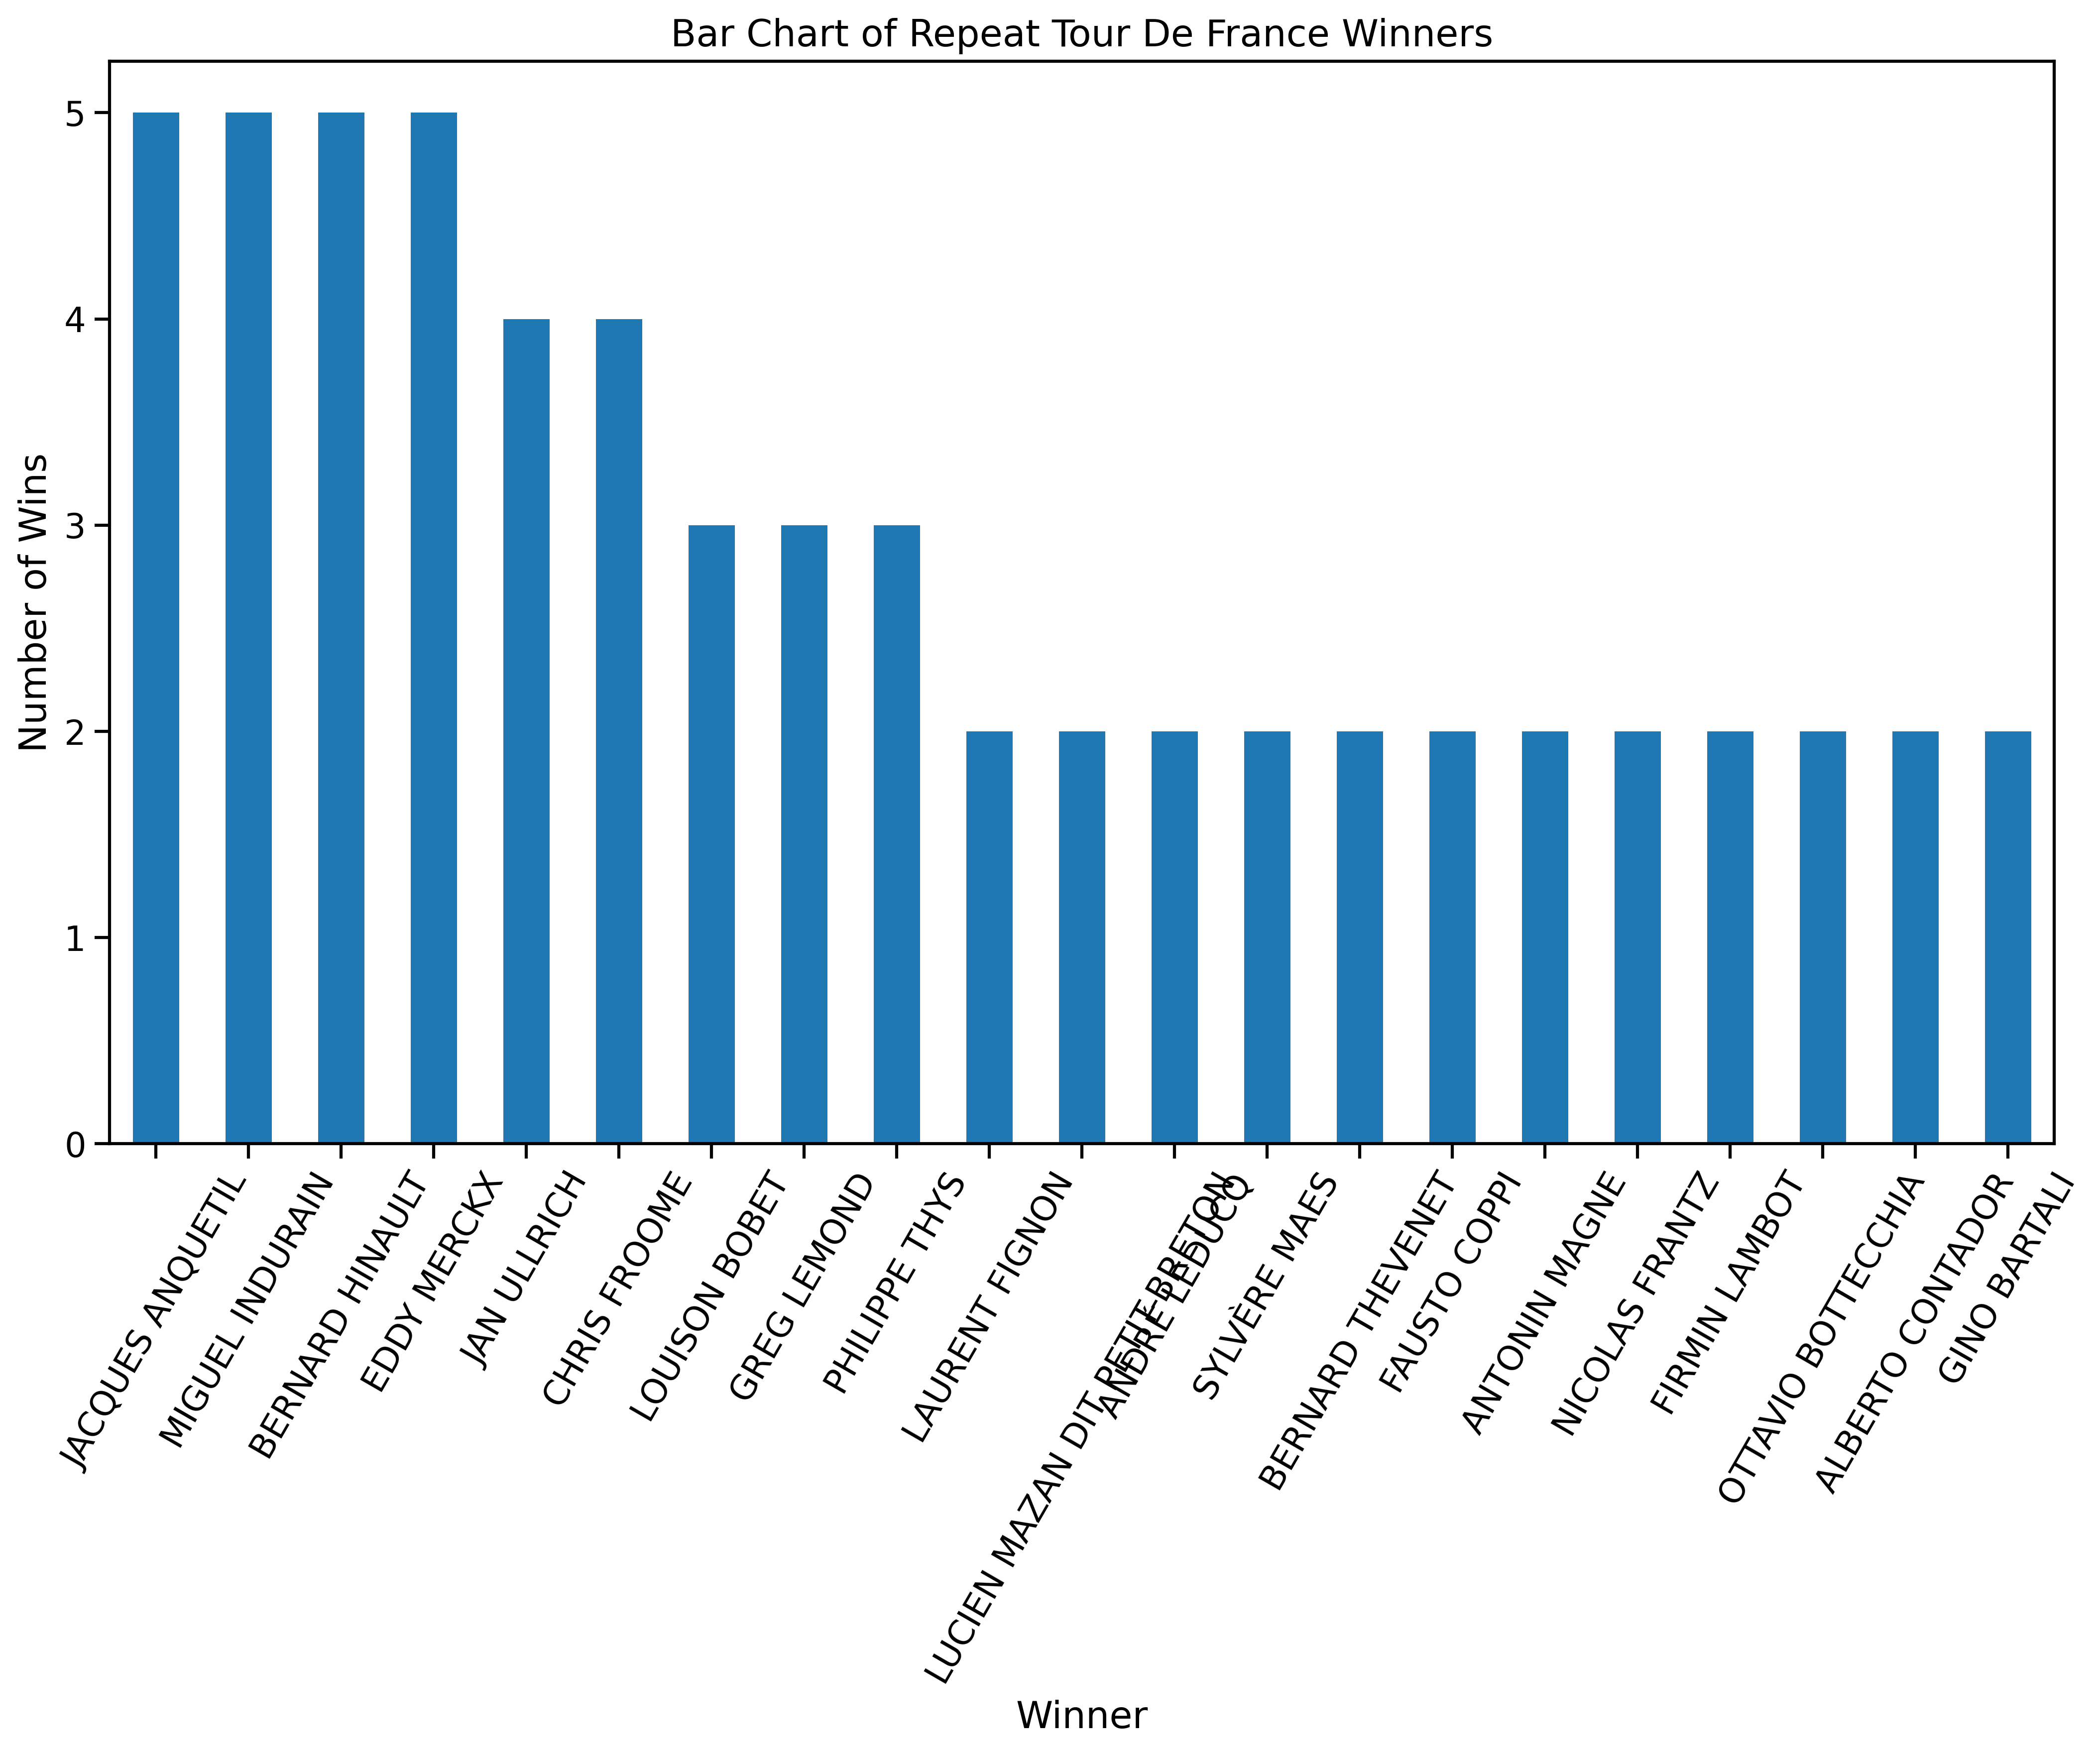

In [ ]:
df2['winner_name'].value_counts().loc[lambda x : x>1]


ax = df2['winner_name'].value_counts().loc[lambda x : x>1].plot(kind='bar',
                                        figsize=(14,8),
                                        title="Bar Chart of Repeat Tour De France Winners")
ax.set_xlabel("Winner")
#lets make it easier to read
degrees = 60
plt.xticks(rotation=degrees)
ax.set_ylabel("Number of Wins")

Text(0.5, 1.0, 'Bar chart of repeat winners')

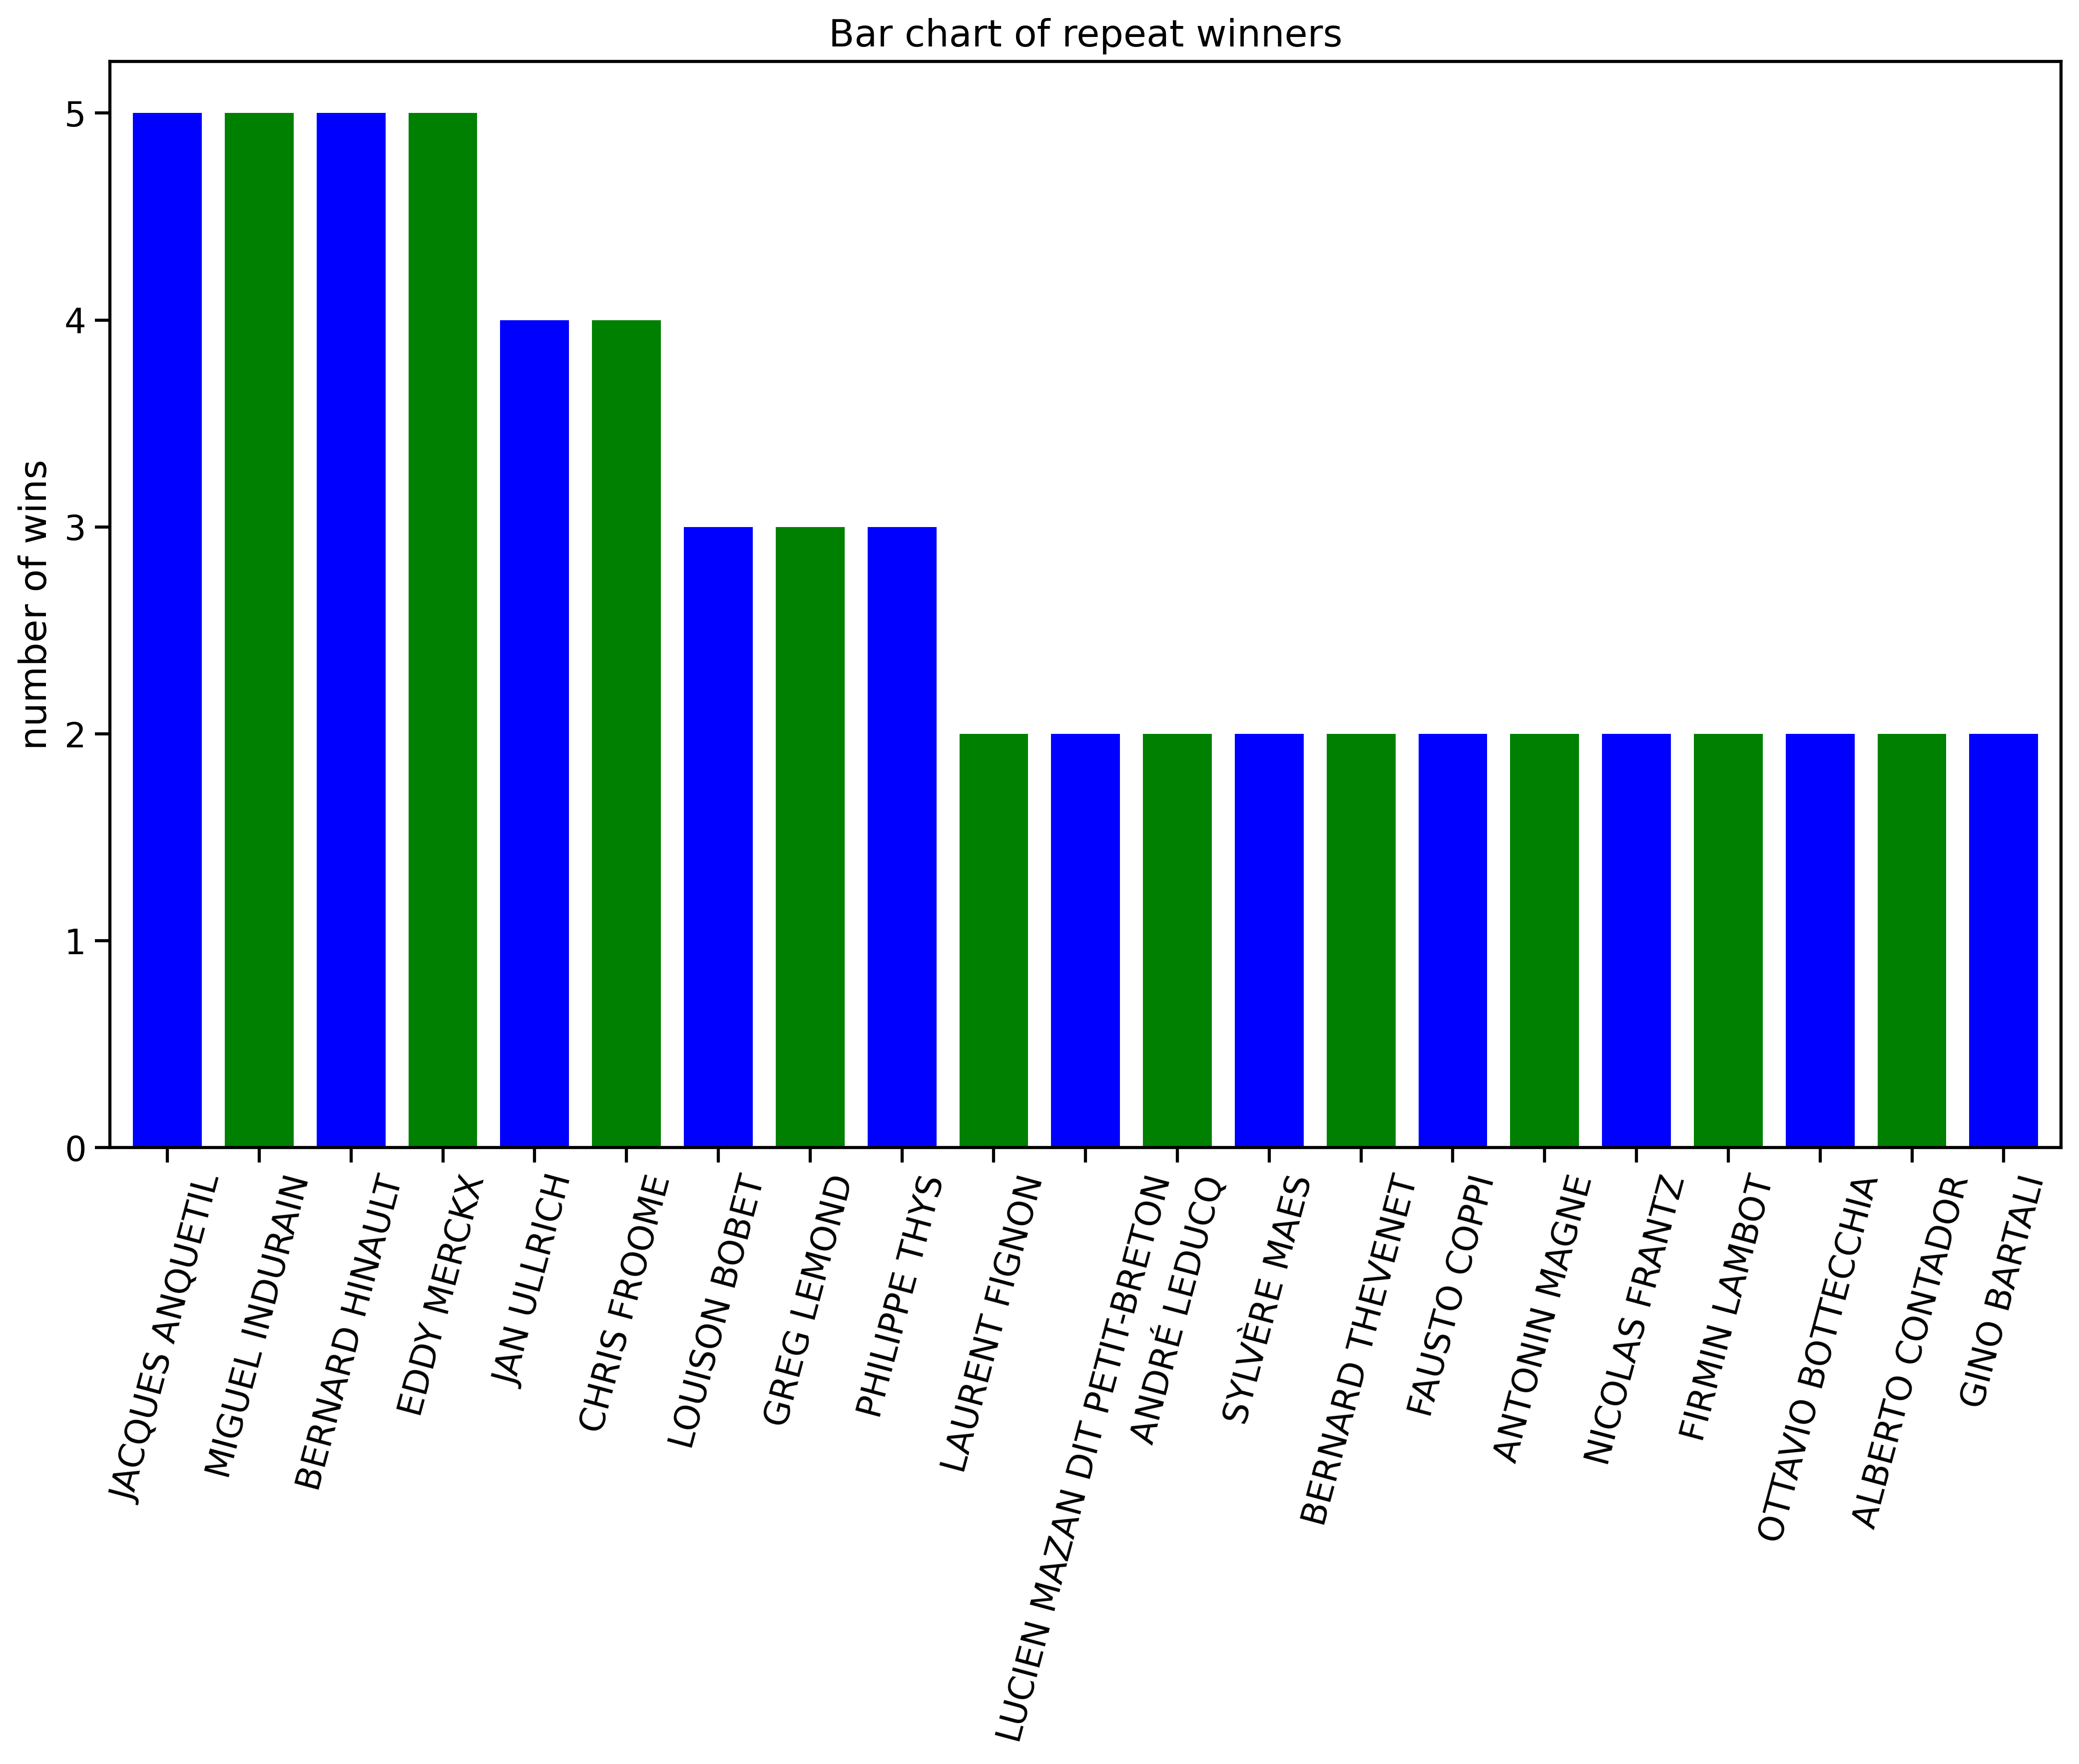

In [ ]:
df2['winner_name'].value_counts().loc[lambda x : x>1].plot(kind='bar', align='center', width = .75,  figsize=(14,8), color=['blue', 'green']);

plt.ylabel('number of wins')
#lets make it easier to read
degrees = 75
plt.xticks(rotation=degrees)
plt.title('Bar chart of repeat winners')


**Time series scatterplot (with trendline)**

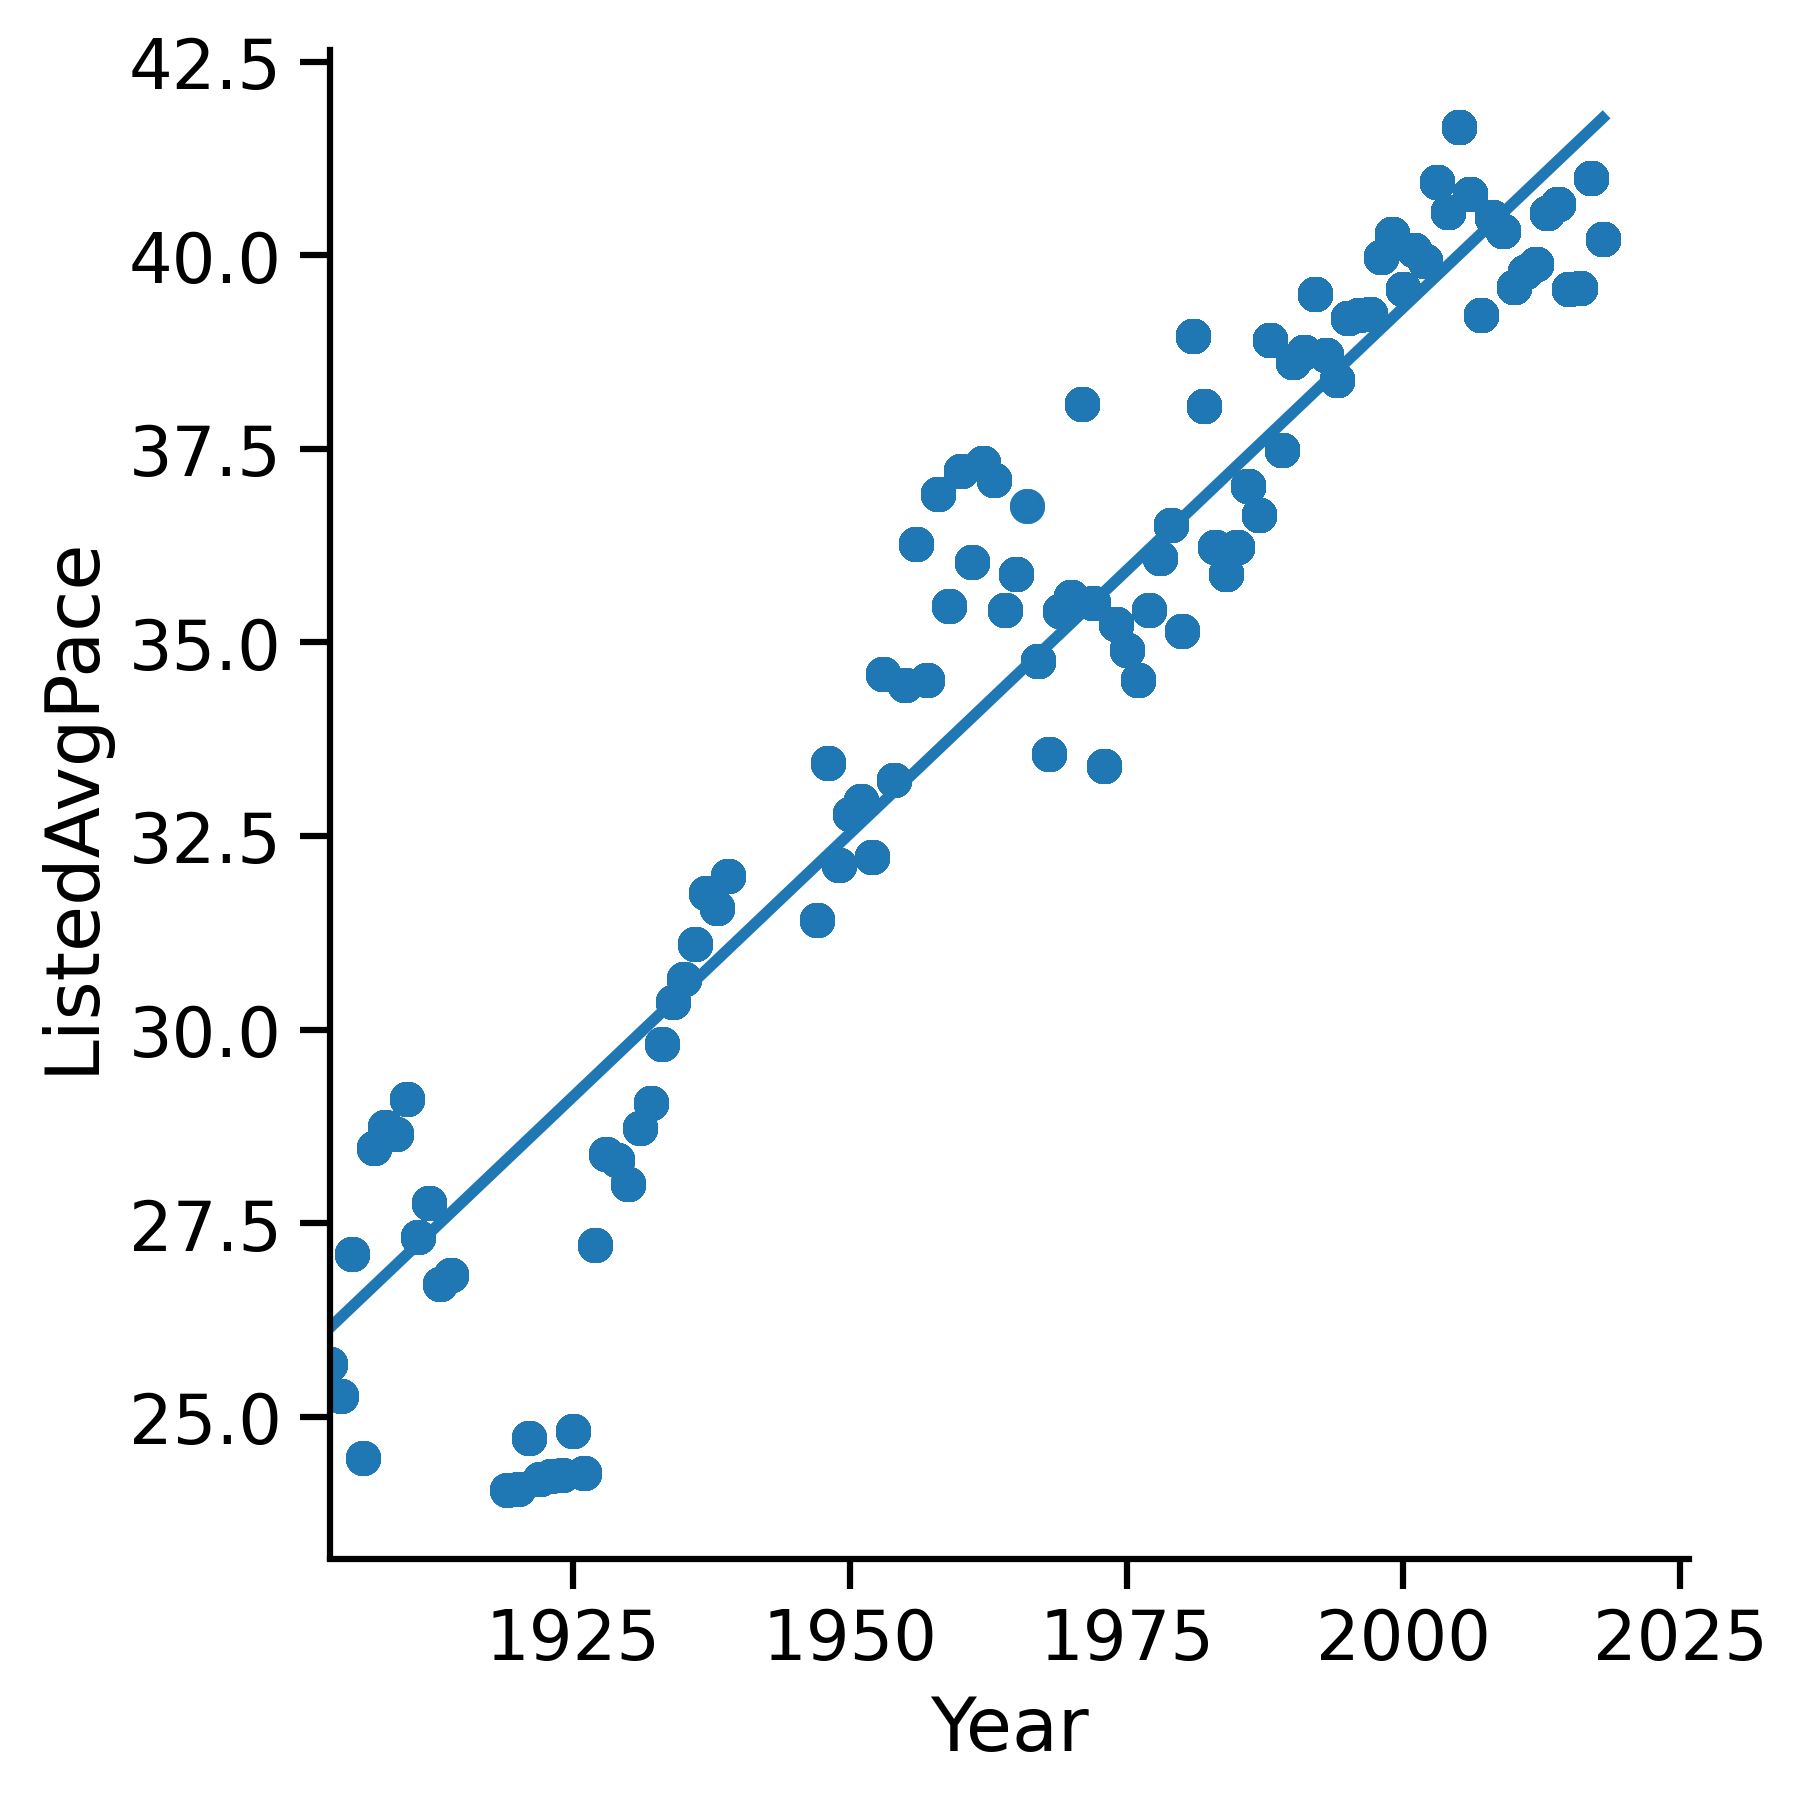

In [ ]:
df = rider_df

_ = sns.lmplot(x='Year', y='ListedAvgPace', data=df, ci=None)

**Comparing Distance to Pace over time** (multiple axes on a single plot)

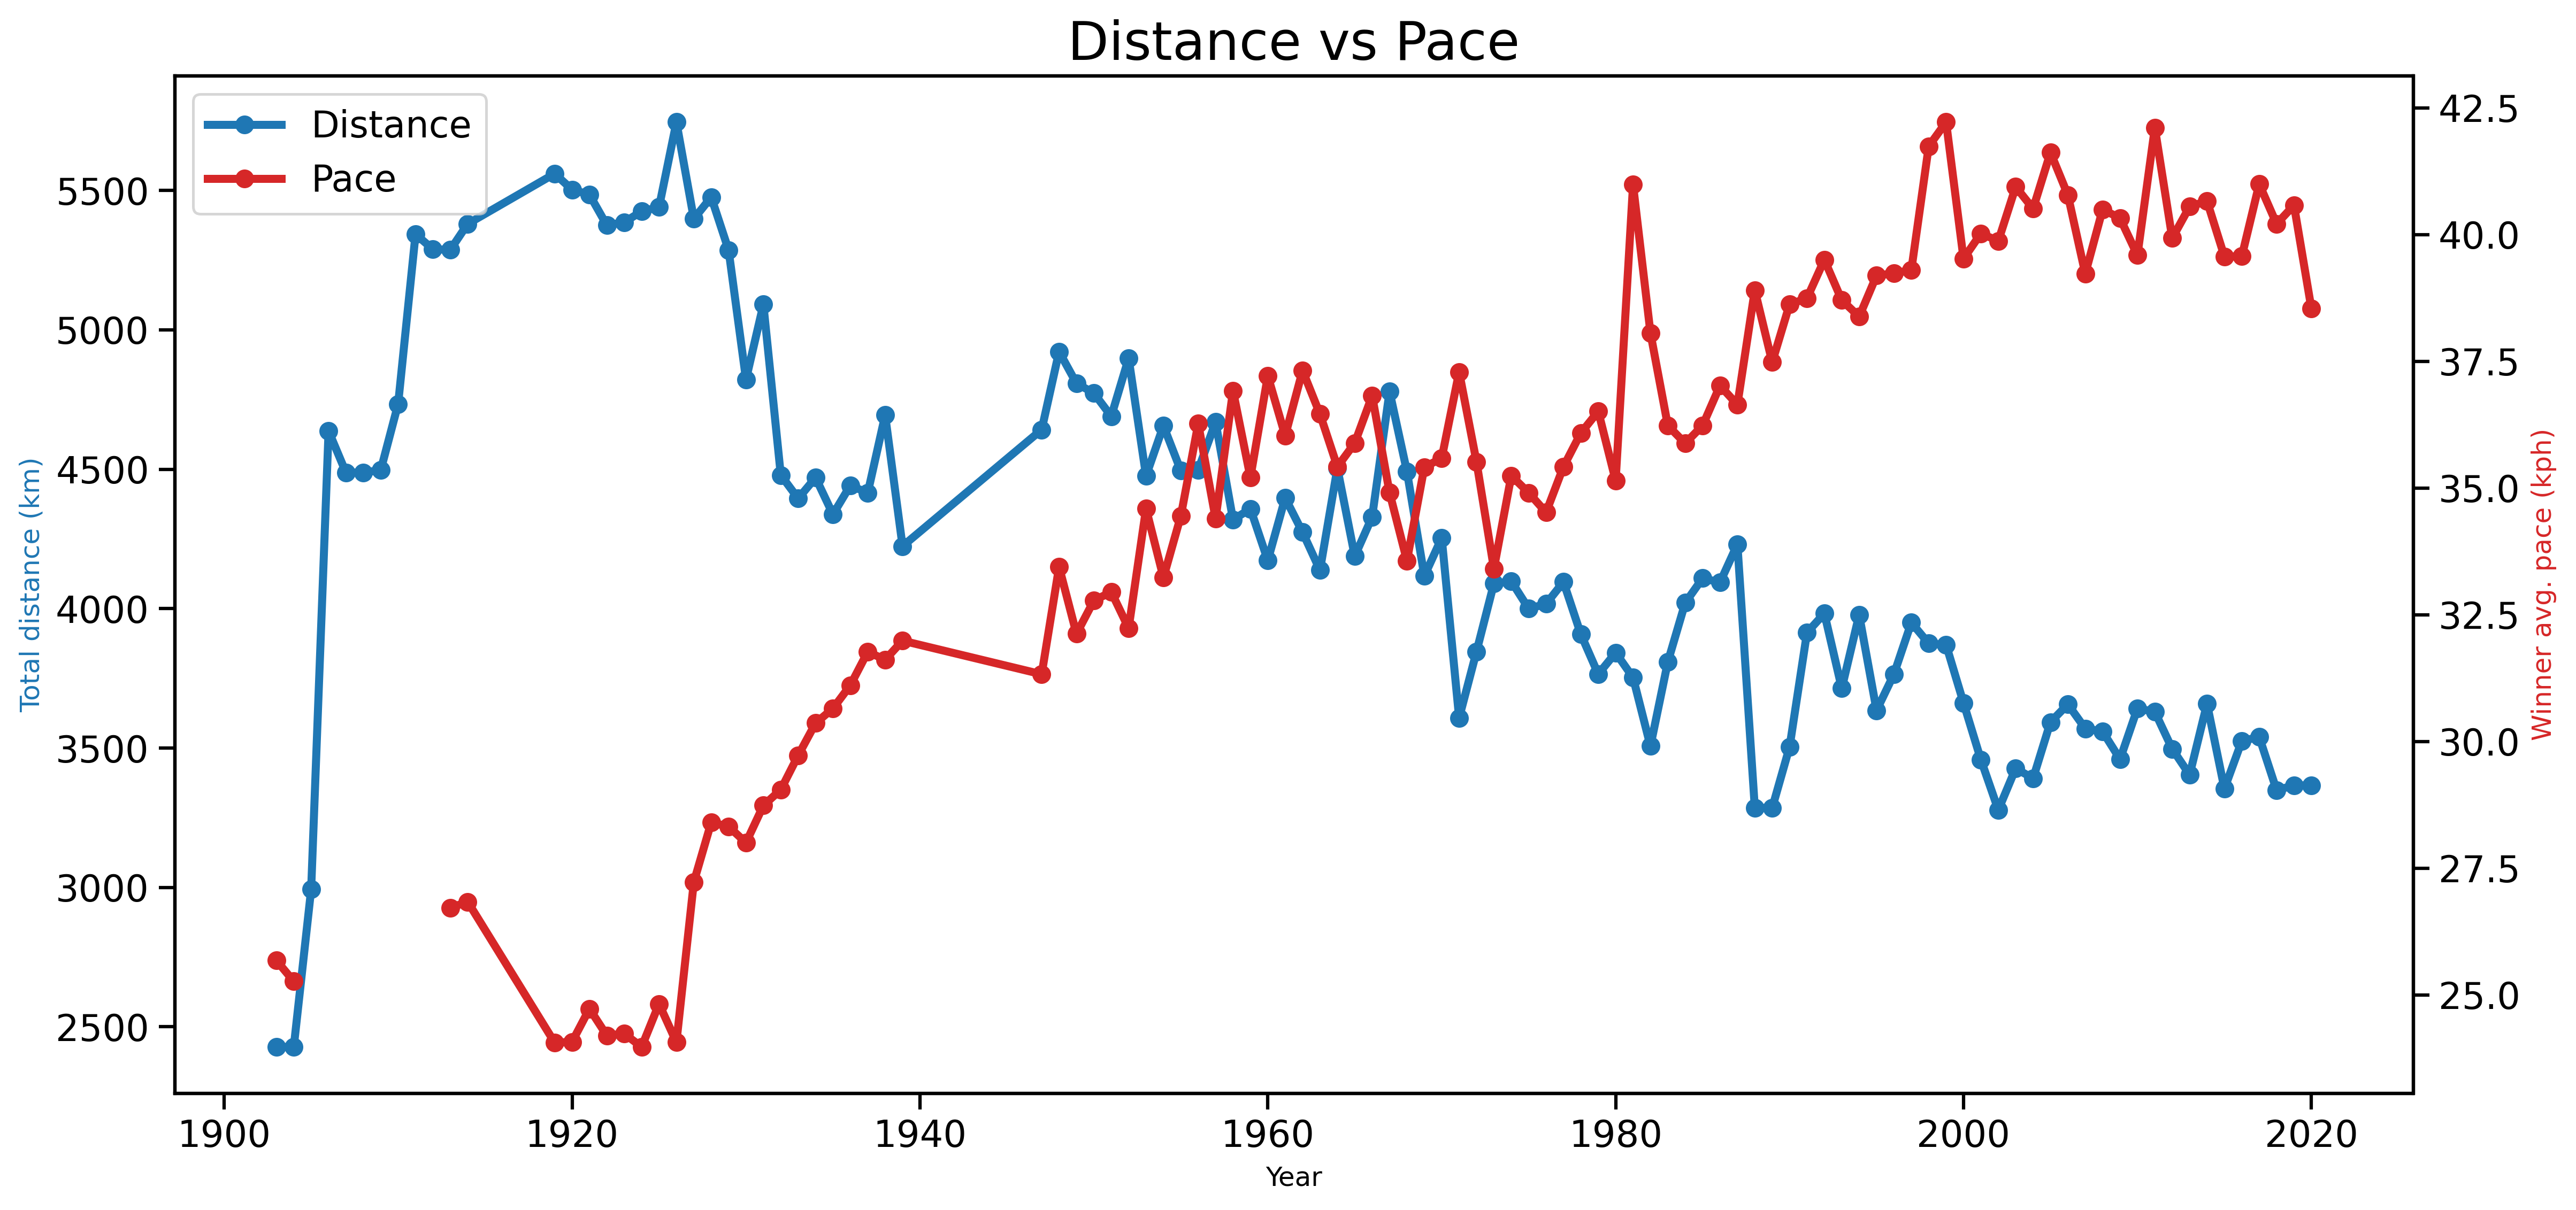

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,distance,"-o", lw = 3, label='Distance')
ax.set_ylabel("Total distance (km)",fontsize = 10,color = "tab:blue")

ax2 = ax.twinx()
ax2.plot(year,winnerpace,"-o",color = "tab:red",lw = 3,label='Pace')
ax2.set_ylabel("Winner avg. pace (kph)",fontsize = 10,color = "tab:red")
ax.set_xlabel("Year",fontsize=10)
#ax.grid("on")
ax.set_title("Distance vs Pace",fontsize=20)

#handling of label consolidation
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left');

**Boxplot of winner paces by nationality**

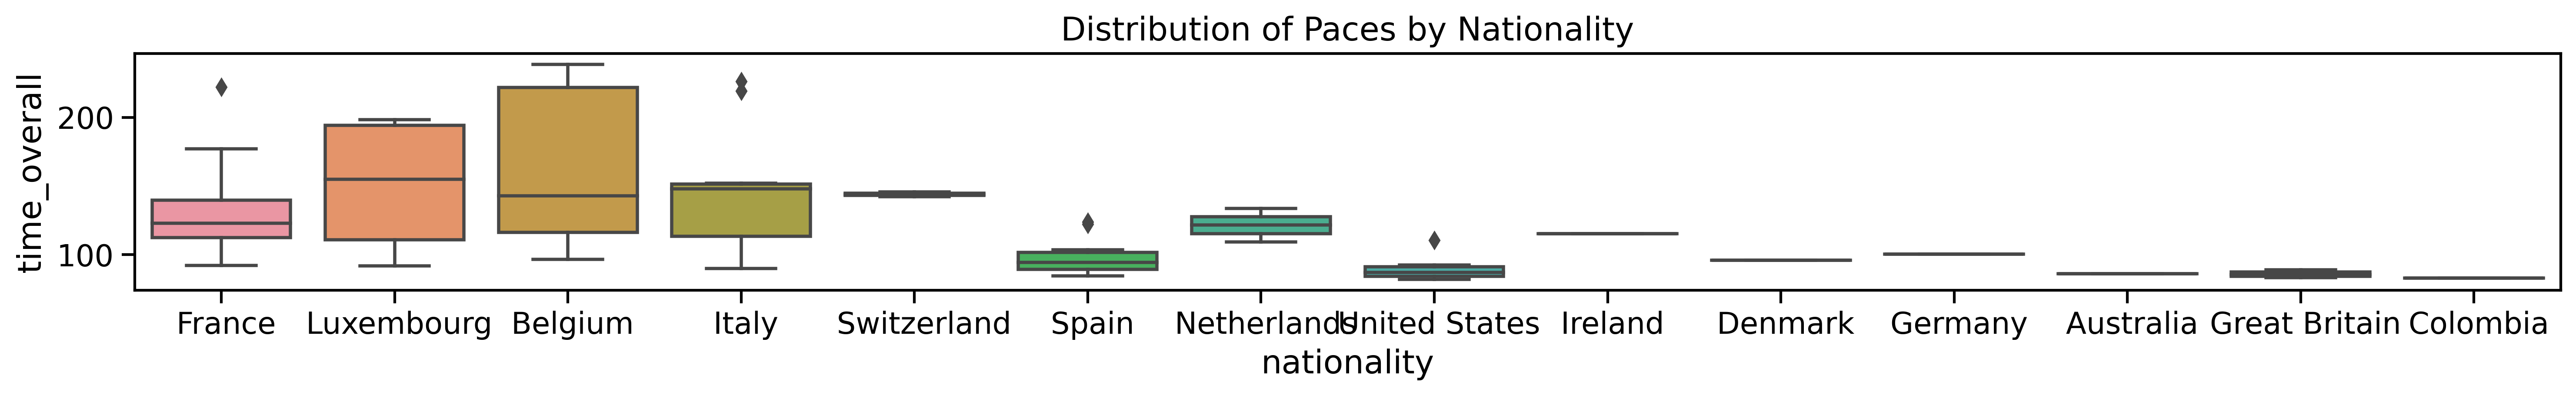

In [ ]:
fig_dims = (20, 2)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(x="nationality", y="time_overall", data=winners_df)
plt.title("Distribution of Paces by Nationality")
plt.show()

**Graphing Predictions** (in progress)

In [ ]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
#rider_df = rider_df.rename(columns={year: 'ds', winnerpace: 'y'})

# Make the prophet model and fit on the data
#gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
#gm_prophet.fit(rider_df)

**Graphing with plotly**

In [ ]:
fig = px.line(rider_df, x="Year", y="ListedAvgPace")

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
          )
)


fig.show()

# Next Steps & Future Analysis

As mentioned earlier, this project clearly just scratches the surface of analysis that can be done on this data set. Some other things I'd like to add or try to this project:

*   Color or highlight certain points in the winners chart for callouts
*   Predicting/forecasting - and charting - winner pace for next 10/15 years (based on data). The primary goal of time sereis analysis is forecasting
*   Anomoly detection (and explanation)
*   Building out a multiple linear regression model to predict the pace of a rider based on factors such as height, weight, age, and nationality


With the advent of analytics touching every sport, [including cycling](https://www.forbes.com/sites/joshualaw/2020/08/26/moneyball-at-the-tour-de-france-how-ntt-is-bringing-analytics-to-pro-cycling/?sh=62b63a19a3b7), more interesting and complex analyses bringing in biometric data, weather, bike types, and more will create even more interesting and hopefully impactful insights in tour de france data analysis.



# Data Sources

These URLs contain the raw data files used to conduct the above analysis


*   https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv 
*   https://raw.githubusercontent.com/camminady/LeTourDataSet/master/Riders.csv




# Extra Resources


The below list is a collection of help sites and resources I came across when conducting this analysis

*  Time series mpatlot: https://saralgyaan.com/posts/plot-time-series-in-python-matplotlib-tutorial-chapter-8/
*   [Pandas dataframe cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
*   Labels and annotations https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
*   [Reading and writing CSV files in Python](stackabuse.com/reading-and-writing-csv-files-in-python-with-pandas/)
*  Line plot graphs with matplotlib (youtube) https://www.youtube.com/watch?v=AYorFcI1MTU
*  Dot plots in plotly https://plotly.com/python/dot-plots/
*   Matplotlib bar charts https://pythonspot.com/matplotlib-bar-chart/
*   More time series: https://unidata.github.io/python-training/workshop/Time_Series/basic-time-series-plotting/
*  Plotting two charts with different scales:  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
*   Dropping first column of data from a data frame https://thispointer.com/pandas-delete-first-column-of-dataframe-in-python/
*   Getting multiple axes to return a single label https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
*   Matplot lib style sheet https://www.python-graph-gallery.com/199-matplotlib-style-sheets
*   Plotly https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e


*   Plotly (line charts) https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
*   Plotly (text and annotations) https://plotly.com/python/text-and-annotations/
*   Time series analysis (wikipedia) https://en.wikipedia.org/wiki/Time_series


# Additional Tour De France Analysis

The Below list includes other forms of Tour De France data analysis

*   https://technology.amis.nl/data-analytics/tour-de-france-data-analysis-using-strava-data-in-jupyter-notebook-with-python-pandas-and-plotly-step-1-single-rider-loading-exploration-wrangling-visualization/
*   https://imgur.com/gallery/hKDOT5Y
*   [A Brief History of Tour De France in Numbers](https://www.kaggle.com/jaminliu/a-brief-tour-of-tour-de-france-in-numbers)
*   https://medium.com/@Ben_Obe/a-brief-look-at-le-tour-de-france-through-the-lense-of-data-c6dc4a68f0c6
*   https://gist.github.com/cavedave/8115b0f5a74f4e088315587e5bdaa4b3
*   http://maiapelletier.rbind.io/post/tidytuesday-tour-de-france-winners/

